# Empalme con la clase anterior.


# NLP: Natural Language Processing.
NLP es la interseccion ciencia de la computacion, inteligencia artificial y linguistica.

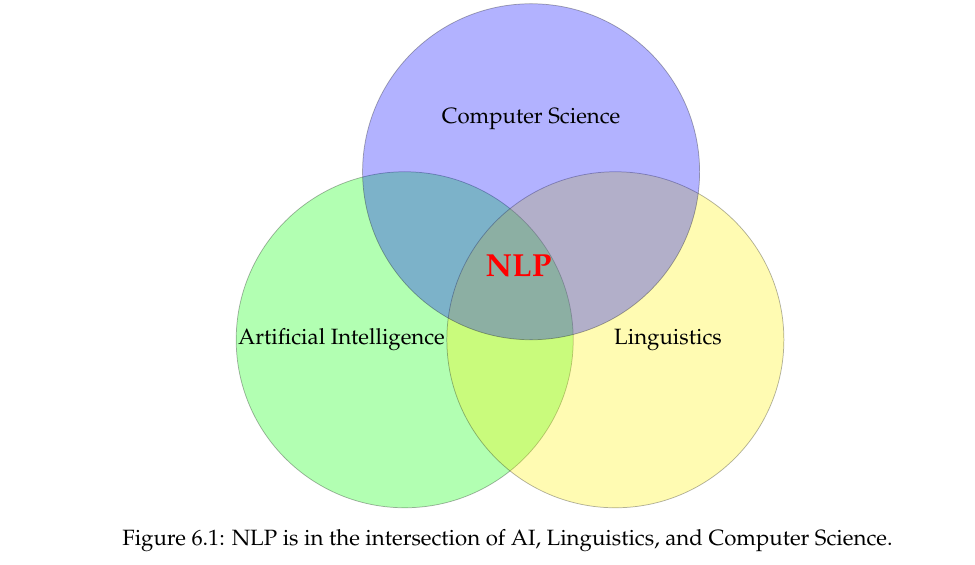

NLP es (de forma simplificada):

* Ciencia de la computacion
* Inteligencia Artificial (AI)
* Linguistica.



Los pasos de NLP son:o

* Speech (habla)
    * Phonetic/Phonolical Analysis
    * Morphological Analysis
    * Syntatic Analysis
    * Semantic Analysis
    * Discourse Processing*
* Text (texto)
    * OCR tokenization
    * Morphological Analysis
    * Syntatic Analysis
    * Semantic Analysis
    * Discourse Processing

OCR: Optical Character Recognition.




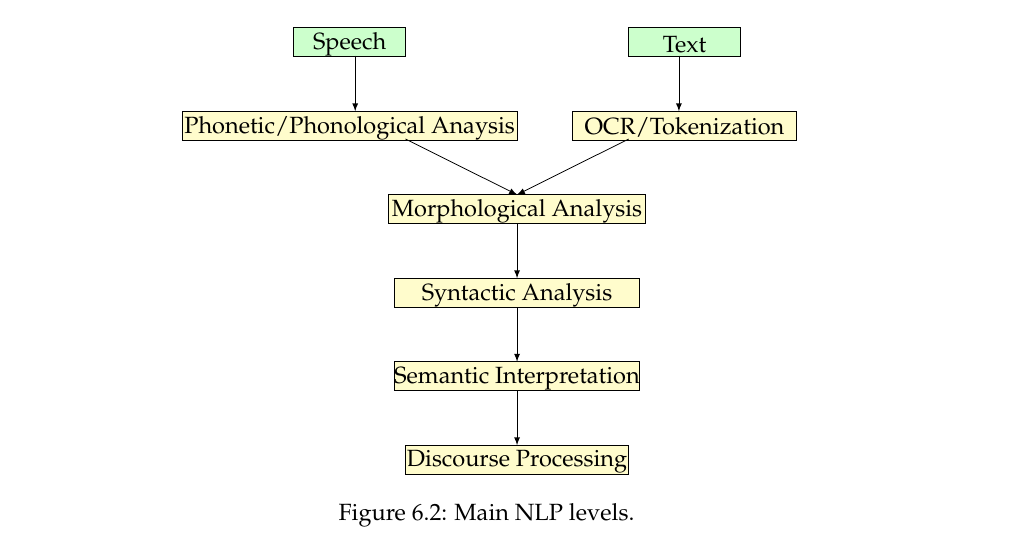

Hay dos tipos de condicionamiento de palabras a espacios reales de altas dimensions:

* Feature extraction techniques.
* Word Embedding.

Sabemos muy bien que el compuador no entiende palabras. Solo numeros. Lo que se hace es "embeber" estas palabras en un espacio vectorial real multidimensional $\mathbb{R}^n$. Aplicaciones como

* Siri
* Google Assistant
* Alexa
* Google Translate
* Sentimental analysis
utilizano **word embedding**.
Por ejemplo las aplicaciones que en el telefono adivinan la proxima palabra (WhatsApp) las usan miles de millones de personas diario.

Necesitamos **cuantificar** aspectos como la **semantica** y la **sintaxis**.

En la historia de esto quiero mencionar a Tomas Mikolov, y amigos  en 2013 publicaron "Linguistic Regularities on Continuous Space Word Representations" (referencia en las notas de clase). Ellos usan analogias.
Por ejemplo $a$ es a $b$ como $c$ es a $__$.
Refiriendose a, por ejemplo

"he" is to "she" as "him" is to "__"
El sistema debe adivinar la palabra "her".

Aunque nosotros cuanticemos estas palabras, frases, etc (tokens) no vamos a evitar la **ambiguedad**.

Por ejemplo:
**clothing** is to **shirt** as "dish" is to **bowl**
Donde esta la ambiguedad? esta aca

**clothing** is to **shirt** as **dish** is to **__**
**clothing** is to **shirt** as **dish** is to **cup**
Como se resuelven estas ambiguiedades con "word embedding"?


Mikolov y amigos presentan la figura que muestro a continuacion.


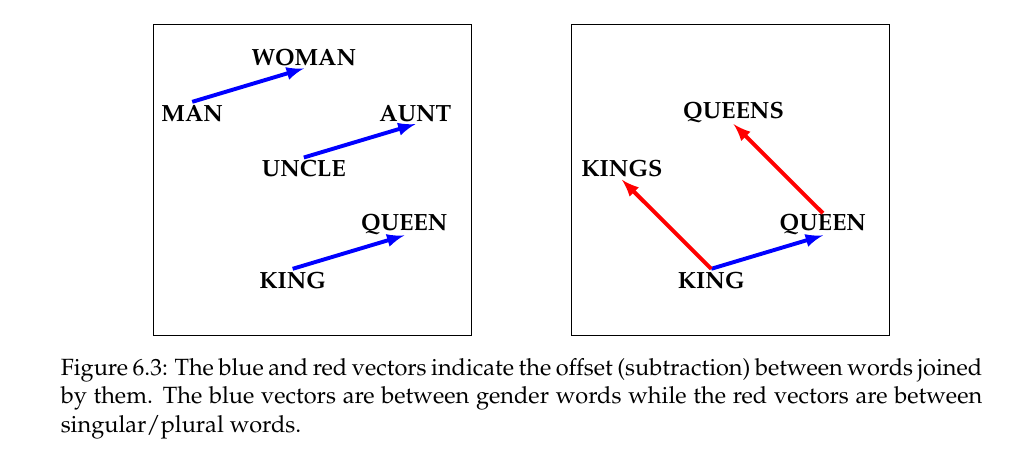

Volvamos a las analogias.
Tenemos matematicamente

$$a:b :: c : __ $$

Si representamos todos estos eventos como vectores $w_b,w_a, w_c, w_d \in \mathbb{R}^n$ tenemos

$$w_b - w_a = w_d - w_c $$
Entonces

$$ w_d = w_b - w_a + w_c $$

El ejemplo clasico de Milov et. al., es

KING-MAN+WOMEN = QUEEN

Se va a acabar la clase pero para donde vamos?

Como vamos a hacer el word embedding?


# why one-hot encoding is not a good option for word representations?


Que metricas debemos usar para hallar la distancia entre dos palabras.

* La metrica euclidiana.  
$$d(x,y) = \| x - y \|^2 $$
En el caso de one-hot encoding veremos que la metrica euclidiana no tiene sentido.

* El coseno. Entre $x,y$ la distancia coseno es

$$d(x,y) = \frac{x \cdot y}{ \| x \| \| y\|} $$
o los normaliza

$$ u = \frac{x}{\| x \|}$$
$$ v = \frac{y}{\| y \|}$$
$$d(u,v) = u \cdot v$$
De nuevo la ilustracion de esto la hago con el one-hot encoding.


El one-hot encoding es util para representar clases categoricas en numericas pero no para representar palabras como vectores.

## Desventajas del one-hot-encoding para representacion de palabras.

* Si tenemos pocas palabras no es un problema.
Por ejemplo tenemos 5 palabras

$$
\text{house}:= \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}  \quad , \quad  
\text{car}:= \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}   \quad , \quad
\text{brush}:= \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}  \quad , \quad
\text{play}:= \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}   \quad , \quad
\text{pretty}:= \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}  
$$




Para pocas palabras no hay problema. Pero cuando muchas,estamos hablando de espacios de muchas dimensiones.

Por ejemplo:
[The Linguistic Data Consortium (LDC](https://catalog.ldc.upenn.edu/LDC2006T13) incluye mas de $10^{12}$ "tokens".

Estamos hablando de espacios con dimensiones inmensas.
El one-hot-encoding no es practico.
Caemos en lo llaman el "curse of dimensionality".

Que problema presentan los one-hot encoders en este caso y particularmente con la metrica Euclidiana.

Tome dos vectores en $\mathbb{R}^n$, con $n \gg 1$.
$e_i, e_j$, donde $e_i$ tiene 1 en la componente $i$ y 0 en las demas, y $e_j$ tiene 1 en la componente $j$ y o en las demas. Ahora cual es la distancia euclidiana entre $e_i$, $e_j$

$$\| e_i - e_j \|_2 = \| (0, 0, \cdots, 1, \cdots, 0, 0  , \cdots -1 ) \|_2  = \sqrt{ 1^2 + (-1)^2}= \sqrt{2} $$
El $1$ esta en la componente $i$ y el $-1$ en la $j$

El concepto de distancia se pierde.

La distancia coseno es 1 entre iguales y 0 entre desiguales.

De cualquier forma la distancia coseno le pone mas cuidado a la fase que a la amplitud. La direccion es mas importante y esta juega un papel muy importane en la semantica.

En el one-hot encoding se pierde el sentido de la semantica por que todos los vectores estan a la misma distancia entre ellos.




## Feature extraction techniques.
Una lista corta de tecnicas de extraccion es

* Bag of Words (BoW)
* Term Frequency-Innverse Document Frequency (TF-IDF)
* Latent Semantic Analysis (LSA)
* Co-current statistics.

### Bag of Words (BoW).
Es mas facil explicar esta tecnica con un ejemplo.

**Ejemplo 1**: Asumamos tres "reviews" de una pelicula

* This movie is boring and is long.
* This movie is spooky and is long.
* This movie is funny and it is crazy.


De estos tres comentarios se construye un diccionario.
Nuesto diccionario (**vocabulario**) esta formado por las palabras:
"This", "movie", "is" , "boring", "spooky", "funny", "and", "long", "it", "crazy". En total 10 palabras.

Construimos una tabla (matriz) donde contamos el numero de apariciones en cada critica.





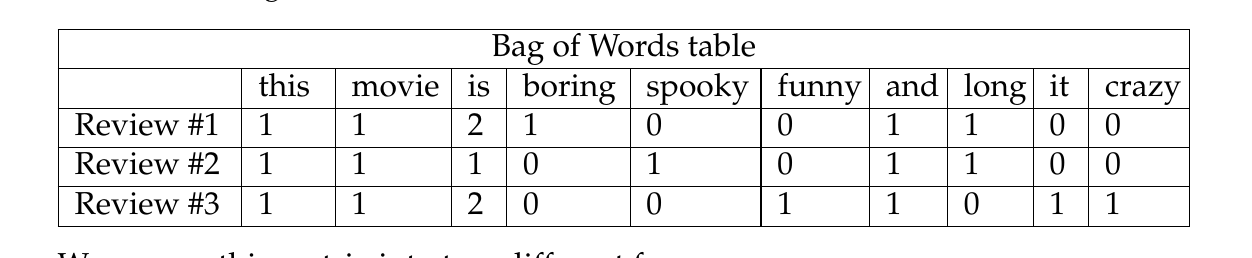

La matriz se puede ver en filas
* Document-term matrices (BoW).
o en columnas
* Term-document matrices (columnas)
En este ultimo caso, por ejemplo

$$\text{is} = \begin{pmatrix} 2 \\ 1 \\ 2  \end{pmatrix} \quad , \quad \text{boring} = \begin{pmatrix} 1 \\ 0 \\ 0  \end{pmatrix} $$



## Term Frequency-Inverse Document Frequency
Por definicion **term frequency** es el numero de veces que una palabra aparece en un "documento"

La idea de este metodo (la historia en las notas de clase) es suprimir palabras que no aportan mucho a las frases. Por ejemplo "what", "is", "an", "this".
A estas palabras, en ingles, se les llaman **stopping words**. La idea del TF-IDF es suprimir las stopping words.

Esta medida es mejor que la anterior en el sentido de que es relativa.
Como se cuantifica el TF (Term Frequency).

$$tf(t, d) = \frac{f_{t,d}}{\sum_i f_{t_i, d_i}} $$
donde
$f_{t,d}$ cuenta el termino $t$ en el documento $d$.
El denominador representa el total del numero de terminos en el documento. Esta medida esta entre 0
y 1.

Veamos ejemplos de **tf** con nuestros "documentos"

**Ejemplo 2**: Tomemos el primer comentario: "This movie is boring and is long".

* El vocabulario completo tiene 10 palabras.
"This", "movie", "is" , "boring", "spooky", "funny", "and", "long", "it", "crazy".

* El numero de tokens en el comentario 1 es 7.
"This", "movie", "is $\times 2$ " , "boring" , "and " , "long"

Asumiendo que mis documentos son este no mas.

$$\text{tf(This)} = \frac{1}{7} \approx 0.43 $$
$$\text{tf(movie)} = \frac{1}{7} \approx 0.43 $$
$$\text{tf(is)} = \frac{2}{7} \approx 0.2757 $$
$$\text{tf(boring)} = \frac{1}{7} \approx 0.2757 $$
$$\text{tf(spookey)} = \frac{0}{7} \approx 0.0 $$
$$\text{tf(funny)} = \frac{0}{7} \approx 0.0 $$
$$\text{tf(and)} = \frac{1}{7} \approx 0.143 $$
$$\text{tf(long)} = \frac{1}{7} \approx 0.143 $$
$$\text{tf(it)} = \frac{0}{7} \approx 0.$$

Podemos construir vectores para "tf", en los documentos
Por ejemplo en el "review #2"
tf(is) = $\frac17$ y en general

$$\text{tf(is)} =\begin{pmatrix} 0.2757 \\ 0.143 \\0.25 \end{pmatrix}  $$

El IDF: Inverse Document Frequency se cuantifica con la formula

$$\text{idf(t,D)} = \log \frac{N}{| d \in D: t \in d |}  $$
Donde $N$ es el total de documentos (para nosotros en el ejemplo 1 son 3). El denominador $| d \in D: t \in d|$ es el numero de documentos que tienen el termino $t$.
Lo que hace el denominador es restarle importancia a los terminos mas comunes "this", "the".

**Ejemplo 3:**
Calcular el idf para todas las palabras en el ejemplo 1.









En nuestro ejemplo $N=3$
$$\text{idf(This)} =  \log \frac{3}{3} = \log 1 = 0 $$
$$\text{idf(movie)} =  \log \frac{3}{3} = \log 1 = 0 $$
$$\text{idf(is)} =  \log \frac{3}{3} = \log 1 = 0 $$
$$\text{idf(boring)} =  \log \frac{3}{1} = \log 3 = 1.099 $$
$$\text{idf(and)} =  \log \frac{3}{3} = \log 1 = 0 $$
$$\text{idf(long)} =  \log \frac{3}{2} = \log 1.5 = 0.405 $$
$$\text{idf(spooky)} =  \log \frac{3}{1} = \log 3 = 1.099 $$
$$\text{idf(funny)} =  \log \frac{3}{1} = \log 3 = 1.099 $$
$$\text{idf(crazy)} =  \log \frac{3}{1} = \log 3 = 1.099 $$


La combinacion del "tf" con el "idf" se calcula con la formula

$$\text{tf-idf(t,d,D))} = \text{tf}(f,d) \text{idf}(t,D) \tag{1} $$

**Ejemplo 4**:
Use la ecuacion (1) para calcular el tf-idf de la palabra "boring"

$$\text{tf-idf(boring)} = 1.099 \begin{pmatrix} 0.2757 \\ 0 \\ 0  \end{pmatrix}   $$

Se me quedaron 2 cosas en el tintero:

* Latent Semantic Analysis tool (LSA)
* Co-current Statistics.

# Proxima clase:
Estas dos ultimas tecnicas y **Word Embedding**